In [1]:
import os 
import requests
from bs4 import BeautifulSoup
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import scipy.stats as stats

In [2]:
# read in data from csv
all_slc_counties_2023 = pd.read_csv("aqs-all-slc-counties-2023.csv")

In [3]:
all_slc_counties_2023.columns

Index(['Unnamed: 0', 'state_code', 'county_code', 'site_number',
       'parameter_code', 'poc', 'latitude', 'longitude', 'datum', 'parameter',
       'date_local', 'time_local', 'date_gmt', 'time_gmt',
       'sample_measurement', 'units_of_measure', 'units_of_measure_code',
       'sample_duration', 'sample_duration_code', 'sample_frequency',
       'detection_limit', 'uncertainty', 'qualifier', 'method_type', 'method',
       'method_code', 'state', 'county', 'date_of_last_change', 'cbsa_code'],
      dtype='object')

In [4]:
all_slc_counties_2023.head()

,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,...,detection_limit,uncertainty,qualifier,method_type,method,method_code,state,county,date_of_last_change,cbsa_code
0,0,49,3,5,88101,1,41.48993,-112.021435,WGS84,PM2.5 - Local Conditions,...,2.0,NaN,NaN,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,145,Utah,Box Elder,2024-01-17,36260
1,1,49,3,5,88101,1,41.48993,-112.021435,WGS84,PM2.5 - Local Conditions,...,2.0,NaN,NaN,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,145,Utah,Box Elder,2024-01-17,36260
2,2,49,3,5,88101,1,41.48993,-112.021435,WGS84,PM2.5 - Local Conditions,...,2.0,NaN,NaN,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,145,Utah,Box Elder,2024-01-17,36260
3,3,49,3,5,88101,1,41.48993,-112.021435,WGS84,PM2.5 - Local Conditions,...,2.0,NaN,NaN,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,145,Utah,Box Elder,2024-01-17,36260
4,4,49,3,5,88101,1,41.48993,-112.021435,WGS84,PM2.5 - Local Conditions,...,2.0,NaN,NaN,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,145,Utah,Box Elder,2024-01-17,36260


In [5]:
all_slc_counties_2023.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,153906.0,76952.500000,44428.979602,0.000000,38476.250000,76952.500000,115428.750000,153905.000000
state_code,153906.0,49.000000,0.000000,49.000000,49.000000,49.000000,49.000000,49.000000
county_code,153906.0,33.544878,14.067792,3.000000,35.000000,35.000000,35.000000,57.000000
site_number,153906.0,2352.624232,1540.176822,4.000000,1003.000000,3010.000000,3015.000000,5010.000000
parameter_code,153906.0,88101.000000,0.000000,88101.000000,88101.000000,88101.000000,88101.000000,88101.000000
poc,153906.0,3.002001,1.324887,1.000000,2.000000,3.000000,4.000000,5.000000
latitude,153906.0,40.812804,0.448332,40.136378,40.598056,40.736389,40.807897,41.842649
longitude,153906.0,-111.933867,0.150156,-112.355780,-112.008760,-111.901851,-111.872222,-111.657936
sample_measurement,152673.0,7.360734,7.330927,-5.700000,3.300000,5.500000,8.600000,130.700000
units_of_measure_code,153906.0,105.000000,0.000000,105.000000,105.000000,105.000000,105.000000,105.000000


In [6]:
all_slc_counties_2023.nunique()

Unnamed: 0               153906
state_code                    1
county_code                   7
site_number                  14
parameter_code                1
poc                           5
latitude                     15
longitude                    15
datum                         2
parameter                     1
date_local                  365
time_local                   24
date_gmt                    366
time_gmt                     24
sample_measurement          786
units_of_measure              1
units_of_measure_code         1
sample_duration               2
sample_duration_code          2
sample_frequency              4
detection_limit               1
uncertainty                   0
qualifier                    28
method_type                   2
method                        2
method_code                   2
state                         1
county                        7
date_of_last_change          85
cbsa_code                     4
dtype: int64

In [7]:
for column in all_slc_counties_2023.columns[2:]:
    value_counts = all_slc_counties_2023[column].value_counts()
    print(f'Column: {column}\n{value_counts}\n')

Column: county_code
35    89790
49    18310
5     18250
57     9125
11     9125
45     9125
3       181
Name: county_code, dtype: int64

Column: site_number
7       18250
4       18250
3006    17885
3013    17520
3010     9490
4001     9185
1003     9125
4002     9125
2005     9125
3015     9125
5010     9125
3014     8760
3016     8760
5         181
Name: site_number, dtype: int64

Column: parameter_code
88101    153906
Name: parameter_code, dtype: int64

Column: poc
3    52925
1    30111
4    26280
5    26280
2    18310
Name: poc, dtype: int64

Column: latitude
41.842649    18250
40.736389    17885
40.496392    17520
40.784220     9490
40.341389     9185
41.303614     9125
40.902967     9125
40.662961     9125
40.598056     9125
40.777145     9125
40.600550     9125
40.136378     9125
40.709762     8760
40.807897     8760
41.489930      181
Name: latitude, dtype: int64

Column: longitude
-111.852199    18250
-111.872222    17885
-112.036298    17520
-111.931000     9490
-111.713611  

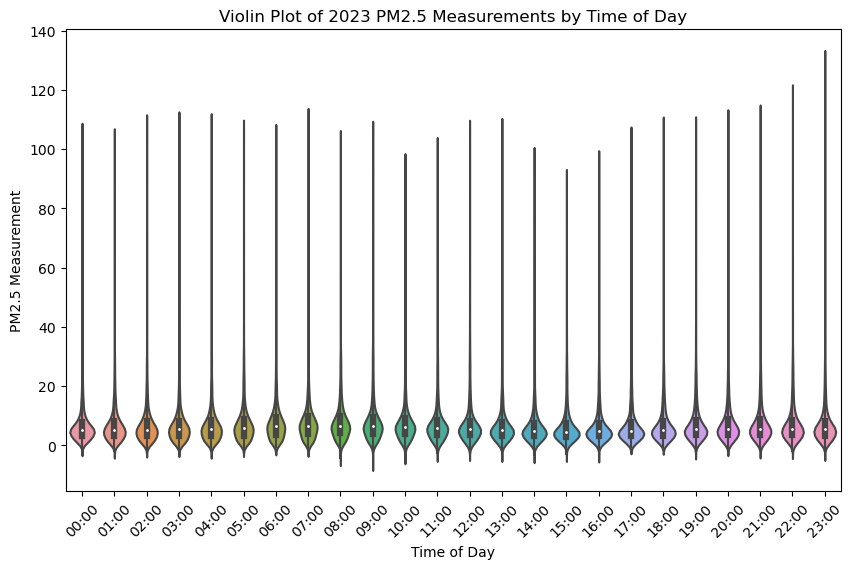

In [8]:
# Order by time
order = all_slc_counties_2023['time_local'].unique()
order.sort()  # Sort the unique categories

plt.figure(figsize=(10, 6))
sns.violinplot(x='time_local', y='sample_measurement', data=all_slc_counties_2023, order = order)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.xlabel('Time of Day')
plt.ylabel('PM2.5 Measurement')
plt.title('Violin Plot of 2023 PM2.5 Measurements by Time of Day')

plt.show()

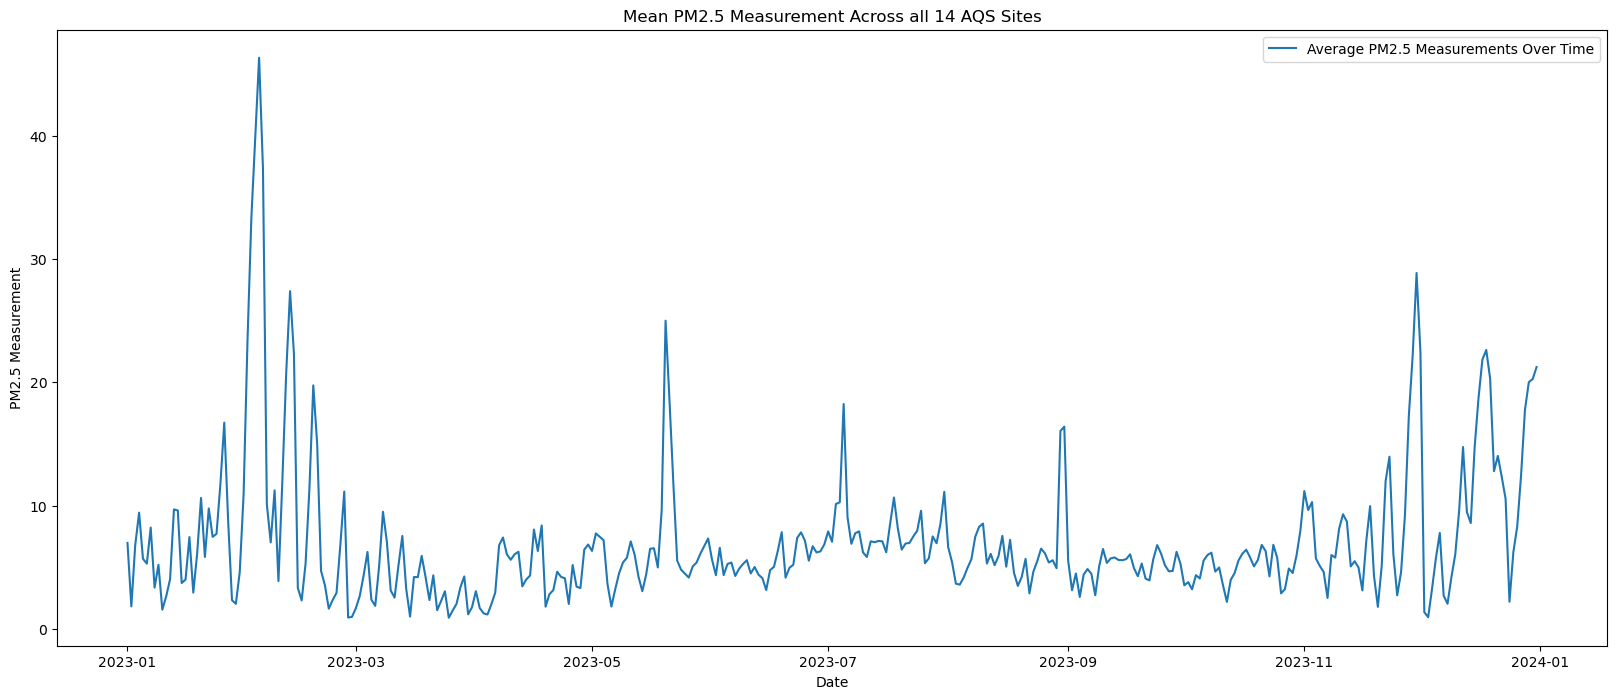

In [9]:
# convert to datetime format
all_slc_counties_2023['date_local'] = pd.to_datetime(all_slc_counties_2023['date_local'])

# subset the dataframe for noon readings
all_slc_counties_2023_noon = all_slc_counties_2023[all_slc_counties_2023['time_local'] == "00:00"]

# aggregate data by taking the mean sample measurement for each date
all_sensor_noon_avg = all_slc_counties_2023_noon.groupby('date_local')['sample_measurement'].mean().reset_index()

# Plot aggregated data
plt.figure(figsize=(20, 8))
plt.plot(all_sensor_noon_avg['date_local'], all_sensor_noon_avg['sample_measurement'], label='Average PM2.5 Measurements Over Time')

plt.xlabel('Date')
plt.ylabel('PM2.5 Measurement')
plt.title('Mean PM2.5 Measurement Across all 14 AQS Sites')
plt.legend()
plt.show()


# Do the same for PM10

In [10]:
all_slc_counties_2023_pm10 = pd.read_csv("aqs-all-slc-counties-2023-pm10.csv")

In [11]:
all_slc_counties_2023_pm10.nunique()

Unnamed: 0               1825
state_code                  1
county_code                 3
site_number                 5
parameter_code              1
poc                         2
latitude                    5
longitude                   5
datum                       2
parameter                   1
date_local                365
time_local                  1
date_gmt                  365
time_gmt                    1
sample_measurement         67
units_of_measure            1
units_of_measure_code       1
sample_duration             1
sample_duration_code        1
sample_frequency            1
detection_limit             1
uncertainty                 0
qualifier                   6
method_type                 1
method                      1
method_code                 1
state                       1
county                      3
date_of_last_change        19
cbsa_code                   3
dtype: int64

In [12]:
print(f"PM2.5 Sensors: {all_slc_counties_2023['site_number'].unique()}")
print(f"PM10.0 Sensors: {all_slc_counties_2023_pm10['site_number'].unique()}")

PM2.5 Sensors: [   5    7 1003    4 3010 3013 3014 3006 4002 3016 2005 3015 4001 5010]
PM10.0 Sensors: [1003 3013 3015 3006 4001]


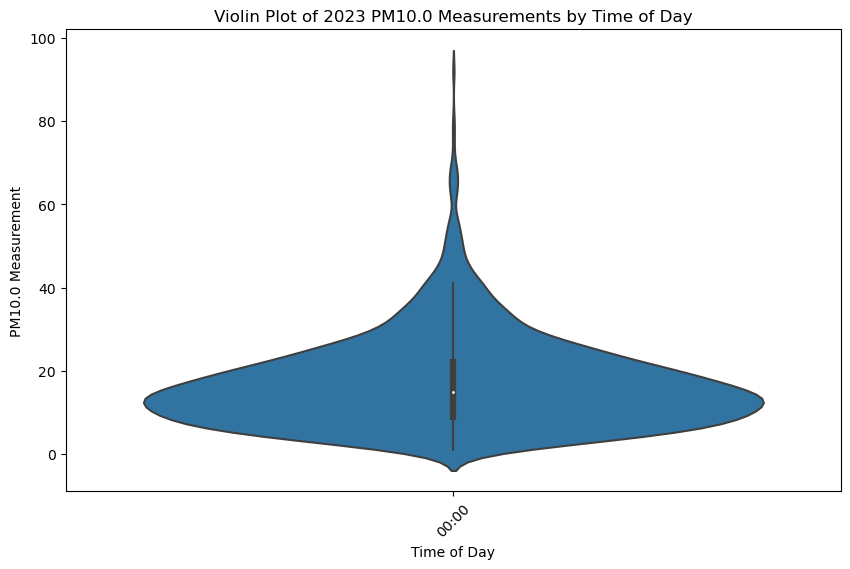

In [13]:
# Order by time
order = all_slc_counties_2023_pm10['time_local'].unique()
order.sort()  # Sort the unique categories

plt.figure(figsize=(10, 6))
sns.violinplot(x='time_local', y='sample_measurement', data=all_slc_counties_2023_pm10, order = order)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.xlabel('Time of Day')
plt.ylabel('PM10.0 Measurement')
plt.title('Violin Plot of 2023 PM10.0 Measurements by Time of Day')

plt.show()

In [14]:
all_slc_counties_2023_pm10.columns

Index(['Unnamed: 0', 'state_code', 'county_code', 'site_number',
       'parameter_code', 'poc', 'latitude', 'longitude', 'datum', 'parameter',
       'date_local', 'time_local', 'date_gmt', 'time_gmt',
       'sample_measurement', 'units_of_measure', 'units_of_measure_code',
       'sample_duration', 'sample_duration_code', 'sample_frequency',
       'detection_limit', 'uncertainty', 'qualifier', 'method_type', 'method',
       'method_code', 'state', 'county', 'date_of_last_change', 'cbsa_code'],
      dtype='object')

In [15]:
all_slc_counties_2023_pm10['site_number'].value_counts()

1003    365
3013    365
3015    365
3006    365
4001    365
Name: site_number, dtype: int64

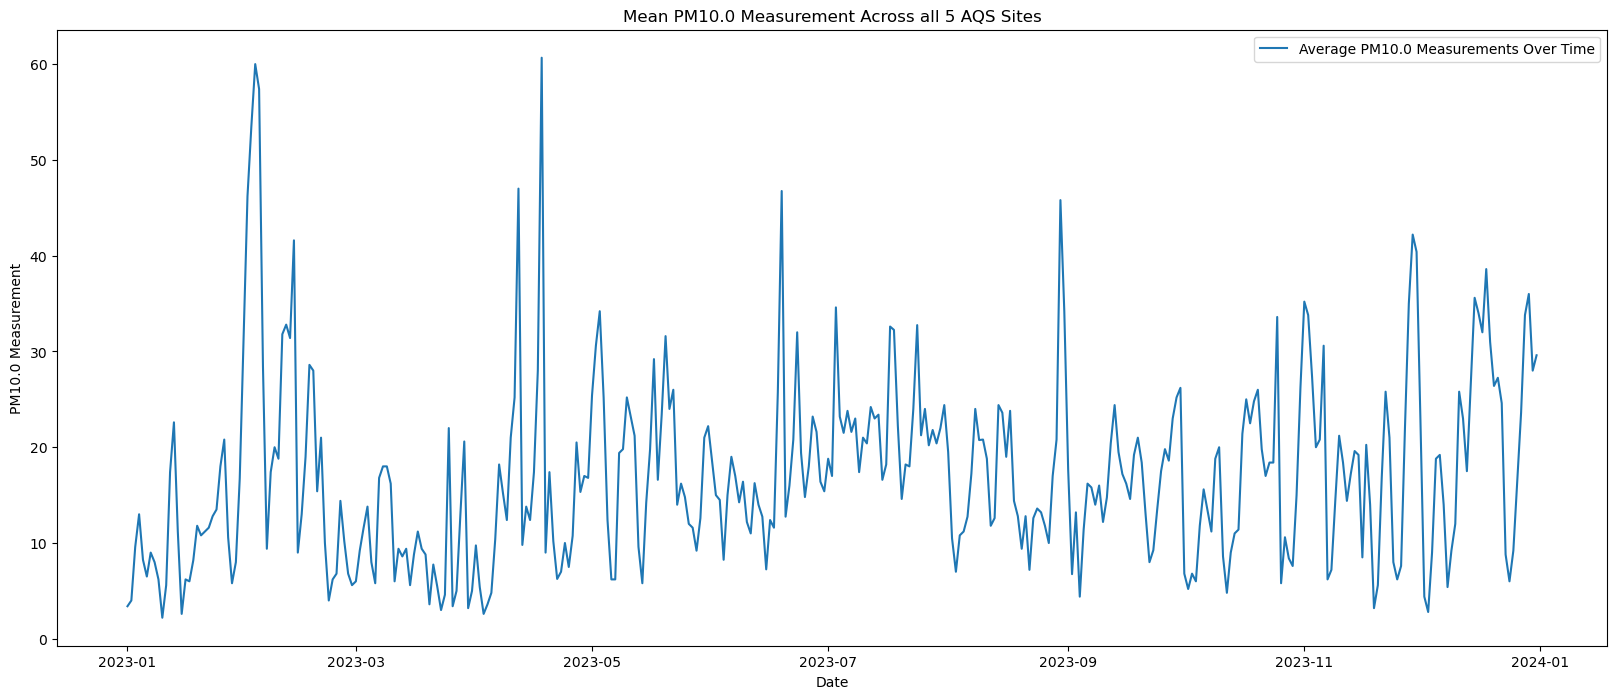

In [16]:
# convert to datetime format
all_slc_counties_2023_pm10['date_local'] = pd.to_datetime(all_slc_counties_2023_pm10['date_local'])

# aggregate data by taking the mean sample measurement for each date
all_sensor_midnight_avg = all_slc_counties_2023_pm10.groupby('date_local')['sample_measurement'].mean().reset_index()

# Plot aggregated data
plt.figure(figsize=(20, 8))
plt.plot(all_sensor_midnight_avg['date_local'], all_sensor_midnight_avg['sample_measurement'], label='Average PM10.0 Measurements Over Time')

plt.xlabel('Date')
plt.ylabel('PM10.0 Measurement')
plt.title('Mean PM10.0 Measurement Across all 5 AQS Sites')
plt.legend()
plt.show()

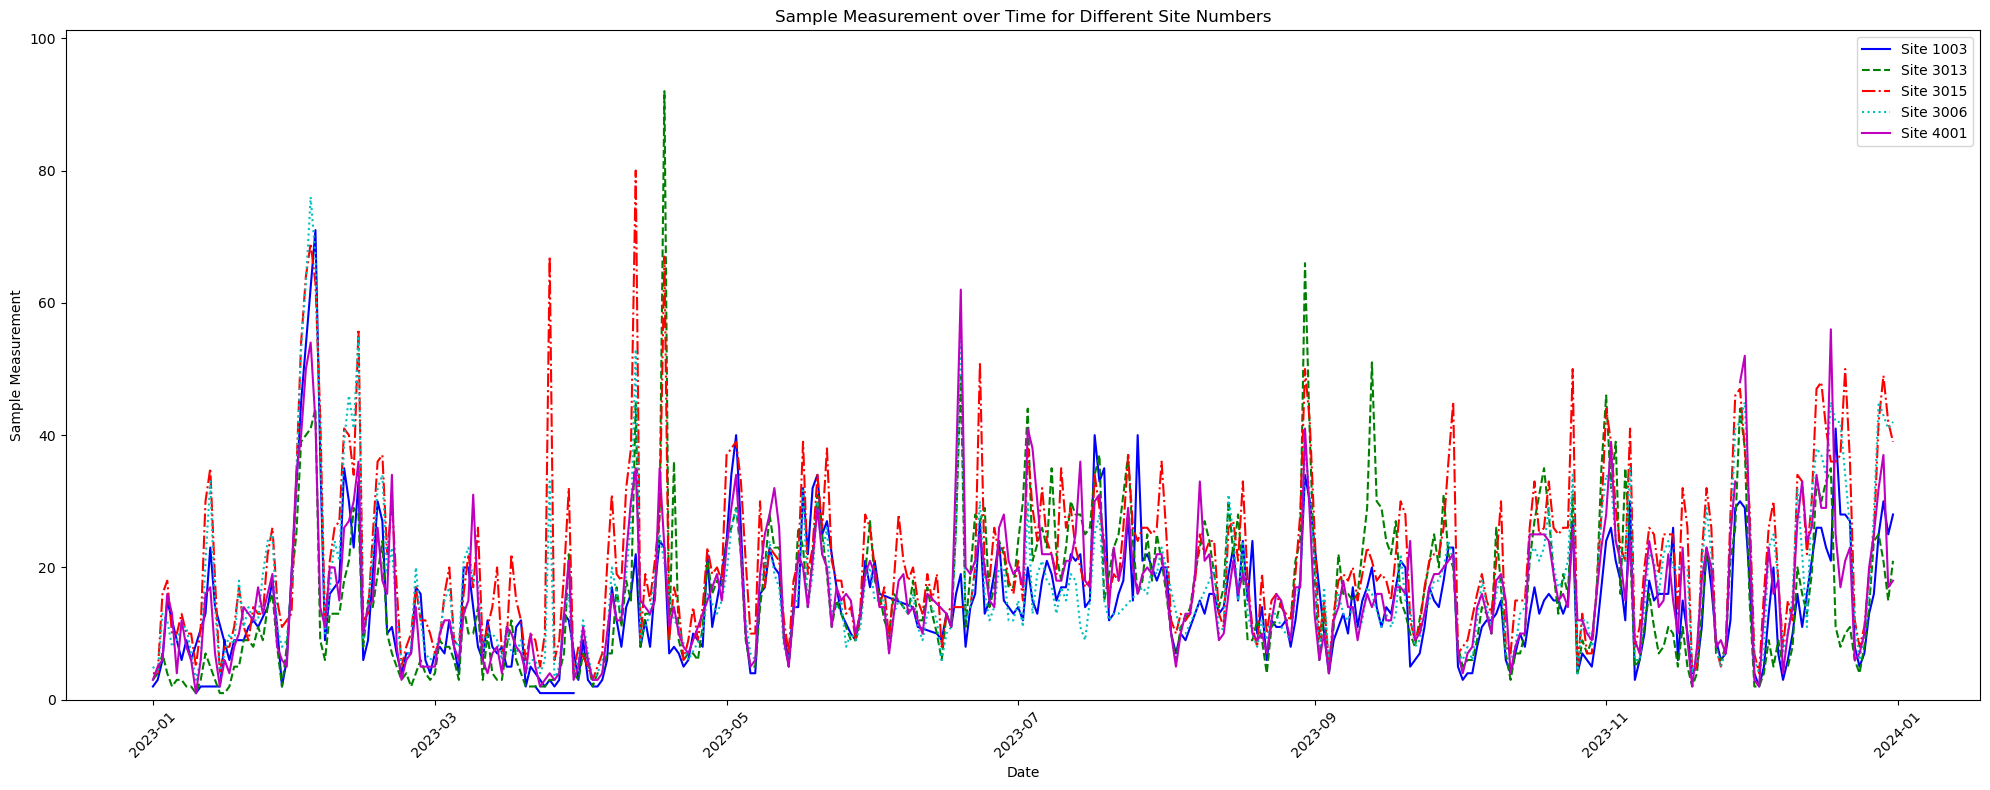

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Filter unique site numbers
unique_site_numbers = all_slc_counties_2023_pm10['site_number'].unique()

# Set figure size
plt.figure(figsize=(20, 8))  # Adjust width and height as needed

# Define line styles and colors
line_styles = ['-', '--', '-.', ':', '-']
colors = ['b', 'g', 'r', 'c', 'm']


# Plot each site_number separately
for i, site_number in enumerate(unique_site_numbers):
    site_data = all_slc_counties_2023_pm10[all_slc_counties_2023_pm10['site_number'] == site_number]
    plt.plot(site_data['date_local'], site_data['sample_measurement'], 
             label=f"Site {site_number}", linestyle=line_styles[i % len(line_styles)], color=colors[i % len(colors)])

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Sample Measurement')
plt.title('Sample Measurement over Time for Different Site Numbers')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust y-axis limits
plt.ylim(0, all_slc_counties_2023_pm10['sample_measurement'].max() * 1.1)  # Set the upper limit slightly above the maximum value

plt.tight_layout()

# Show plot
plt.show()

In [18]:
# read in 2012 - 2023 data
all_slc_counties_pm10_2012_2023 = pd.read_csv("aqs-all-slc-counties-pm10-2012-2023.csv")

In [19]:
all_slc_counties_pm10_2012_2023['time_local'].value_counts()

00:00    29513
09:00     5644
12:00     5643
18:00     5643
14:00     5640
         ...  
13:41        1
14:27        1
14:33        1
11:20        1
09:49        1
Name: time_local, Length: 114, dtype: int64

In [20]:
# just pull midnight readings
all_slc_counties_pm10_2012_2023 = all_slc_counties_pm10_2012_2023[all_slc_counties_pm10_2012_2023['time_local'] == "00:00"]


In [21]:
all_slc_counties_pm10_2012_2023['time_local'].value_counts()

00:00    29513
Name: time_local, dtype: int64

In [22]:
# Convert 'date_local' column to datetime type
all_slc_counties_pm10_2012_2023['date_local'] = pd.to_datetime(all_slc_counties_pm10_2012_2023['date_local'])

# Create a new column for the month
all_slc_counties_pm10_2012_2023['month'] = all_slc_counties_pm10_2012_2023['date_local'].dt.month

# Convert the month to a string with zero padding
all_slc_counties_pm10_2012_2023['month'] = all_slc_counties_pm10_2012_2023['month'].apply(lambda x: f'{x:02d}')

In [23]:
all_slc_counties_pm10_2012_2023['month'].value_counts()

05    2561
03    2539
10    2527
08    2514
07    2488
04    2479
12    2479
09    2474
06    2445
11    2422
01    2341
02    2244
Name: month, dtype: int64

In [24]:
# Create a new column for the year
all_slc_counties_pm10_2012_2023['year'] = all_slc_counties_pm10_2012_2023['date_local'].dt.year

In [25]:
all_slc_counties_pm10_2012_2023['year'].value_counts()

2017    5131
2016    4014
2019    2618
2021    2496
2018    2264
2020    2179
2022    2002
2015    1962
2023    1825
2012    1822
2013    1721
2014    1479
Name: year, dtype: int64

In [26]:
all_slc_counties_pm10_2012_2023.columns

Index(['Unnamed: 0', 'state_code', 'county_code', 'site_number',
       'parameter_code', 'poc', 'latitude', 'longitude', 'datum', 'parameter',
       'date_local', 'time_local', 'date_gmt', 'time_gmt',
       'sample_measurement', 'units_of_measure', 'units_of_measure_code',
       'sample_duration', 'sample_duration_code', 'sample_frequency',
       'detection_limit', 'uncertainty', 'qualifier', 'method_type', 'method',
       'method_code', 'state', 'county', 'date_of_last_change', 'cbsa_code',
       'month', 'year'],
      dtype='object')

13.0     1002
9.0       968
14.0      962
12.0      961
10.0      925
         ... 
48.8        1
48.2        1
39.4        1
118.8       1
125.0       1
Name: sample_measurement, Length: 687, dtype: int64
---
Micrograms/cubic meter (LC)    29513
Name: units_of_measure, dtype: int64
---
105    29513
Name: units_of_measure_code, dtype: int64
---
PM10 - LC    29513
Name: parameter, dtype: int64
---
Axes(0.125,0.11;0.775x0.77)
---
R - P Co Partisol Model 2025 - Gravimetric               23208
Virtual Impactor - FDMS-Gravimetric 1405-DF               5113
R - P Co Partisol Model 2000 - Gravimetric                 666
Teledyne API T640 at 5.0 LPM - Broadband spectroscopy      489
T A Series FH 62 C14 Continuous - Gravimetric               37
Name: method, dtype: int64
---
FRM        23874
Non-FRM     5602
FEM           37
Name: method_type, dtype: int64


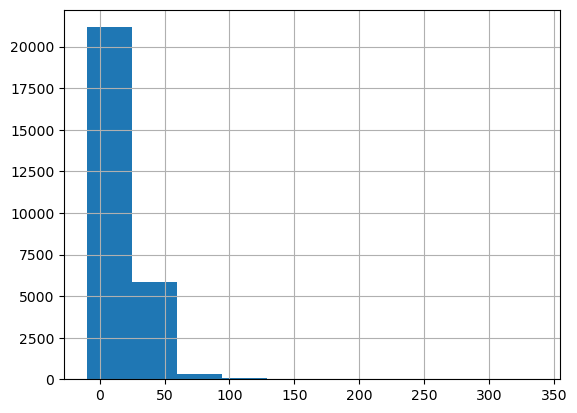

In [27]:
print(all_slc_counties_pm10_2012_2023['sample_measurement'].value_counts())
print('---')
print(all_slc_counties_pm10_2012_2023['units_of_measure'].value_counts())
print('---')
print(all_slc_counties_pm10_2012_2023['units_of_measure_code'].value_counts())
print('---')
print(all_slc_counties_pm10_2012_2023['parameter'].value_counts())
print('---')
print(all_slc_counties_pm10_2012_2023['sample_measurement'].hist())
print('---')
print(all_slc_counties_pm10_2012_2023['method'].value_counts())
print('---')
print(all_slc_counties_pm10_2012_2023['method_type'].value_counts())

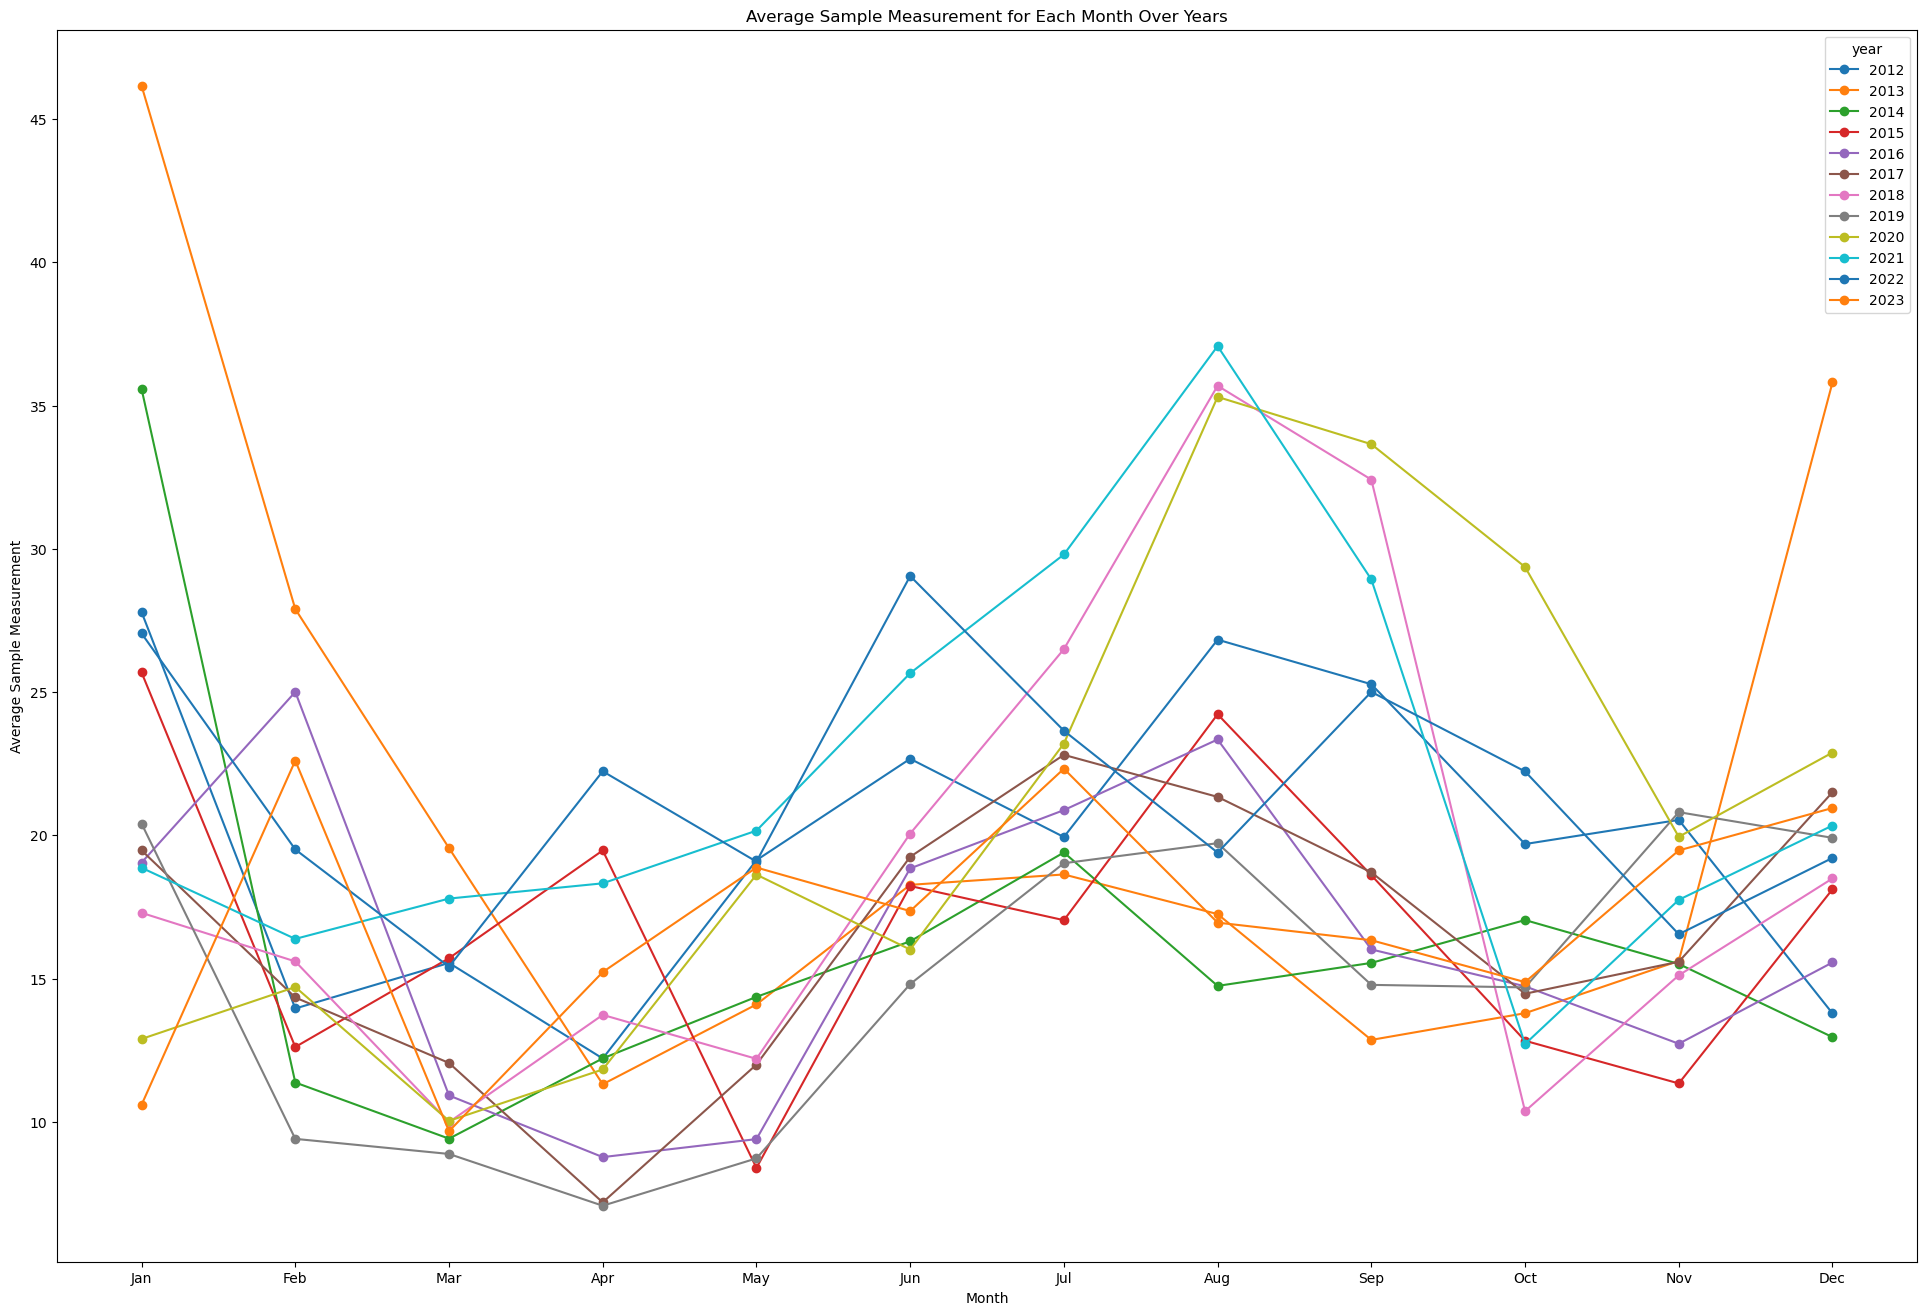

In [28]:
import calendar

# Group data by 'year' and 'month', then calculate the average of 'sample_measurement'
average_measurement = all_slc_counties_pm10_2012_2023.groupby(['year', 'month'])['sample_measurement'].mean()

# Reset index to make 'year' and 'month' columns again
average_measurement = average_measurement.reset_index()

# Pivot the DataFrame to have 'year' as columns and 'month' as rows
pivot_table = average_measurement.pivot(index='month', columns='year', values='sample_measurement')

# Create a new figure and set its size
fig, ax = plt.subplots(figsize=(24, 16))

# Plot the pivot table
pivot_table.plot(kind='line', marker='o', ax=ax)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Sample Measurement')
plt.title('Average Sample Measurement for Each Month Over Years')

# Set x-axis ticks and labels
months = [calendar.month_abbr[i] for i in range(1, 13)]  # Get abbreviated month names
plt.xticks(range(0, 12), months)  # 1 to 12 with month names


# Show plot
plt.show()


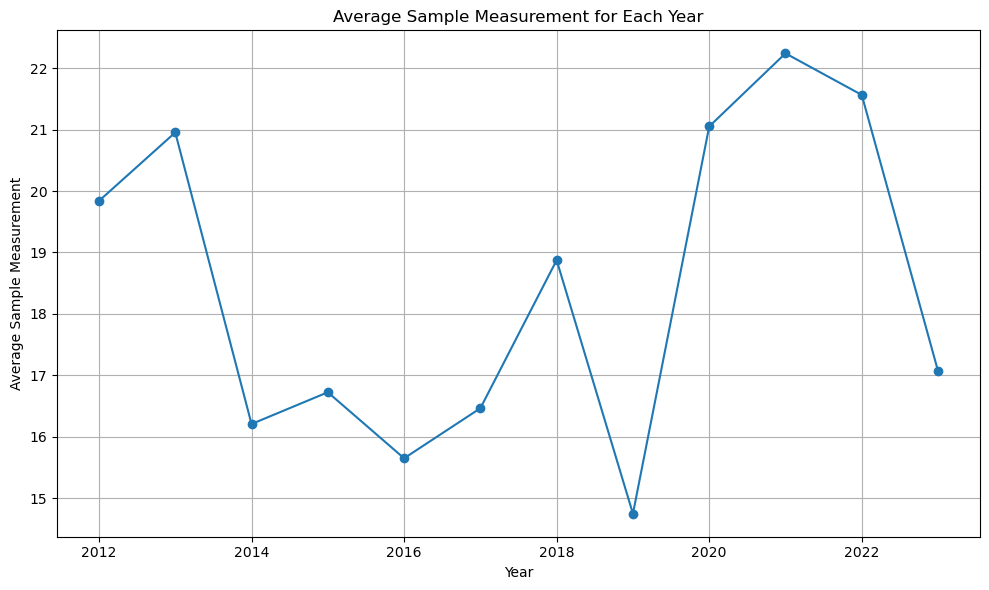

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by 'year' and calculate the average of 'sample_measurement' for each year
average_measurement_by_year = all_slc_counties_pm10_2012_2023.groupby('year')['sample_measurement'].mean()

# Plot the averages for each year
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(average_measurement_by_year.index, average_measurement_by_year.values, marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Sample Measurement')
plt.title('Average Sample Measurement for Each Year')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
